# King County Housing Data

## Project Overview
This project performs Exploratory Data Analysis (EDA) on housing sales data from King County, Washington. The goal is to uncover meaningful insights to support our client, **Bonnie Brown**, who is planning to sell her house in a **middle-class neighborhood** and wants to achieve a **high return** within a short timeframe.

## Objectives
- Understand key factors influencing house prices
- Identify trends specific to middle-class neighborhoods
- Provide actionable recommendations to maximize sale value

## Hypotheses

To guide  the analysis, I formed several hypotheses based on common market assumptions and Bonnie Brown's goals:

1. **Seasonality Affects Sale Price**  
   *Hypothesis:* Houses sell for higher prices during spring and early summer.  

2. **Location Influences Price**  
   *Hypothesis:* Houses in middle-class neighborhoods located closer to urban centers or with better infrastructure have higher price per square foot. 

3. **Renovated Homes Sell for More**  
   *Hypothesis:* Renovated homes in middle-class areas sell at a higher average price than non-renovated ones.  
   
4. **Home Features Correlate with Price**  
   *Hypothesis:* Features such as higher grade, larger living space, and better condition positively correlate with sale price.  
   
These hypotheses will be tested using visual and statistical analysis throughout the notebook.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


## Load Data

In [91]:
df = pd.read_csv("eda_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

## Data Cleaning: Handling Missing Values and Type Conversion

In [ ]:
# Correct improperly formatted renovation years
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: x // 10 if pd.notna(x) and x >= 10000 else x)


df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'] = df['waterfront'].astype(int)
df['view'] = df['view'].fillna(0).astype(int)
df['sqft_basement']= df['sqft_basement'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].astype(int)
df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Drop duplicate house entries based on ID
df = df.drop_duplicates(subset=['id'])

# Confirm no duplicates remain
duplicate_ids = df['id'].duplicated().sum()
print(f"Number of duplicate house IDs after removal: {duplicate_ids}")



Number of duplicate house IDs: 0


## Exploratory Data Analysis (EDA)

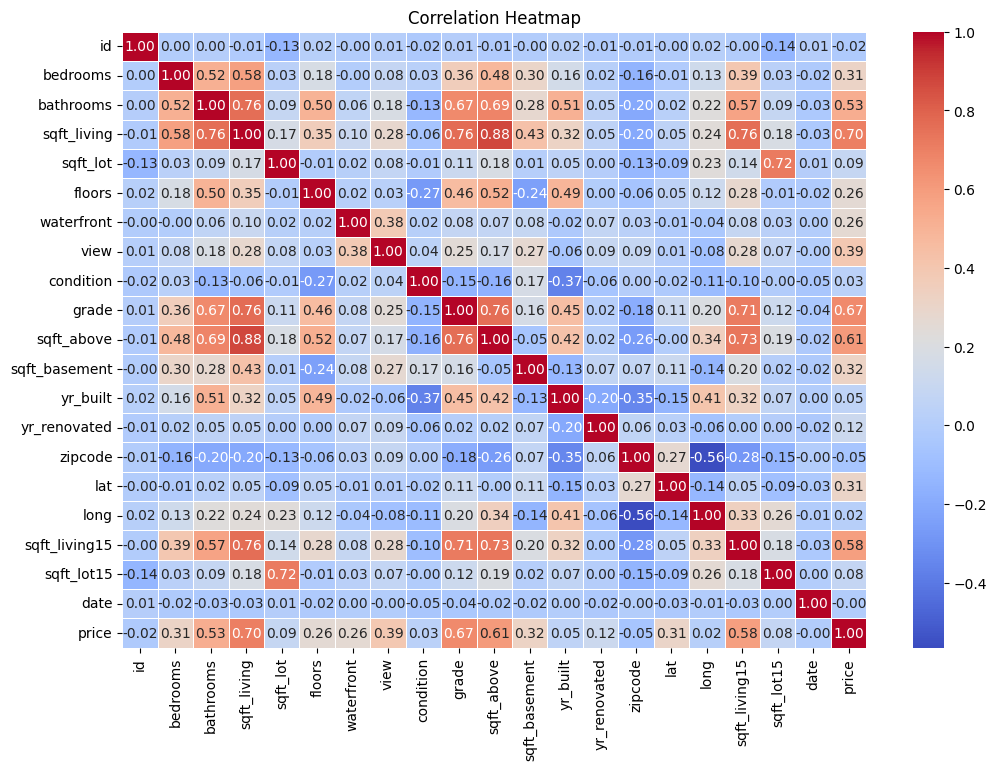

In [ ]:

# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


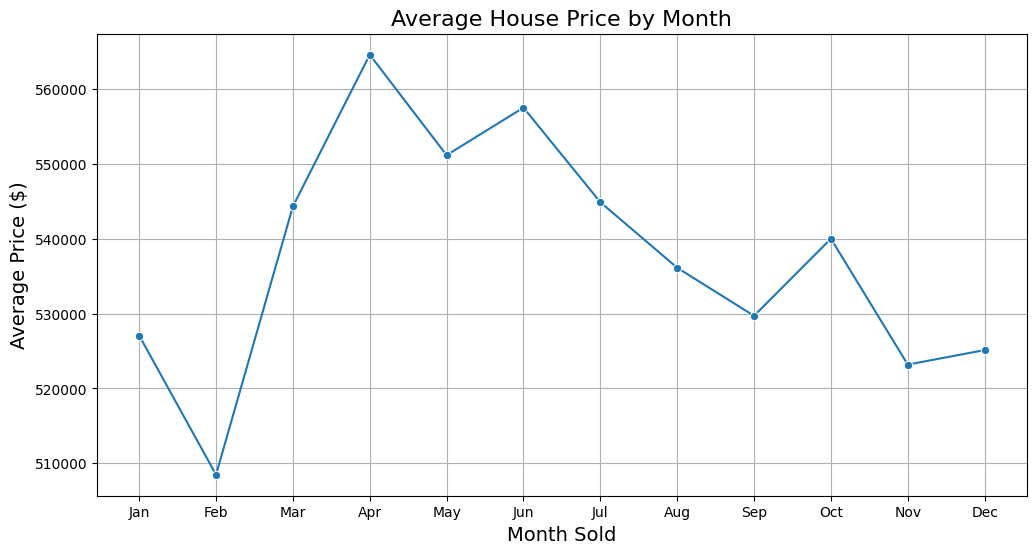

In [ ]:

#  Extract month from date
df['month_sold'] = df['date'].dt.month

#  Group by month and calculate average price
monthly_avg_price = df.groupby('month_sold')['price'].mean().reset_index()

#  Plot Average Price by Month
plt.figure(figsize=(12,6))
sns.lineplot(x='month_sold', y='price', data=monthly_avg_price, marker='o')
plt.title('Average House Price by Month', fontsize=16)
plt.xlabel('Month Sold', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [ ]:
# zipcode to cities
zipcode_to_area = {
    '98002': 'Auburn','98155': 'Shoreline','98188': 'Tukwila','98059': 'Renton','98118': 'Seattle','98003': 'Federal Way',
    '98023': 'Federal Way','98117': 'Seattle','98034': 'Kirkland','98022': 'Enumclaw','98116': 'Seattle','98001': 'Auburn','98010': 'Black Diamond',
    '98198': 'Des Moines','98042': 'Kent','98038': 'Maple Valley','98027': 'Issaquah','98045': 'North Bend','98144': 'Seattle','98029': 'Issaquah',
    '98075': 'Sammamish','98199': 'Seattle','98107': 'Seattle','98105': 'Seattle','98052': 'Redmond','98053': 'Redmond','98014': 'Carnation',
    '98077': 'Woodinville','98115': 'Seattle','98011': 'Bothell','98008': 'Bellevue','98019': 'Duvall','98092': 'Auburn',
    '98074': 'Sammamish','98030': 'Kent','98103': 'Seattle','98004': 'Bellevue','98126': 'Seattle','98177': 'Seattle','98056': 'Renton',
    '98133': 'Seattle','98112': 'Seattle','98033': 'Kirkland','98028': 'Kenmore','98007': 'Bellevue','98005': 'Bellevue','98136': 'Seattle',
    '98031': 'Kent','98032': 'Kent','98168': 'Seattle','98006': 'Bellevue','98178': 'Seattle','98072': 'Woodinville','98102': 'Seattle',
    '98125': 'Seattle','98146': 'Seattle','98166': 'Seattle','98122': 'Seattle','98070': 'Vashon','98148': 'Seattle','98040': 'Mercer Island',
    '98106': 'Seattle','98065': 'Snoqualmie','98108': 'Seattle','98058': 'Renton','98024': 'Fall City','98055': 'Renton','98109': 'Seattle',
    '98119': 'Seattle','98039': 'Medina'
}
# create new column
df['zipcode'] = df['zipcode'].astype(str)
df['area'] = df['zipcode'].map(zipcode_to_area)


C:\Users\twink\AppData\Local\Temp\ipykernel_16344\2384969511.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_price_per_sqft, x='area', y='price_per_sqft', palette='viridis')


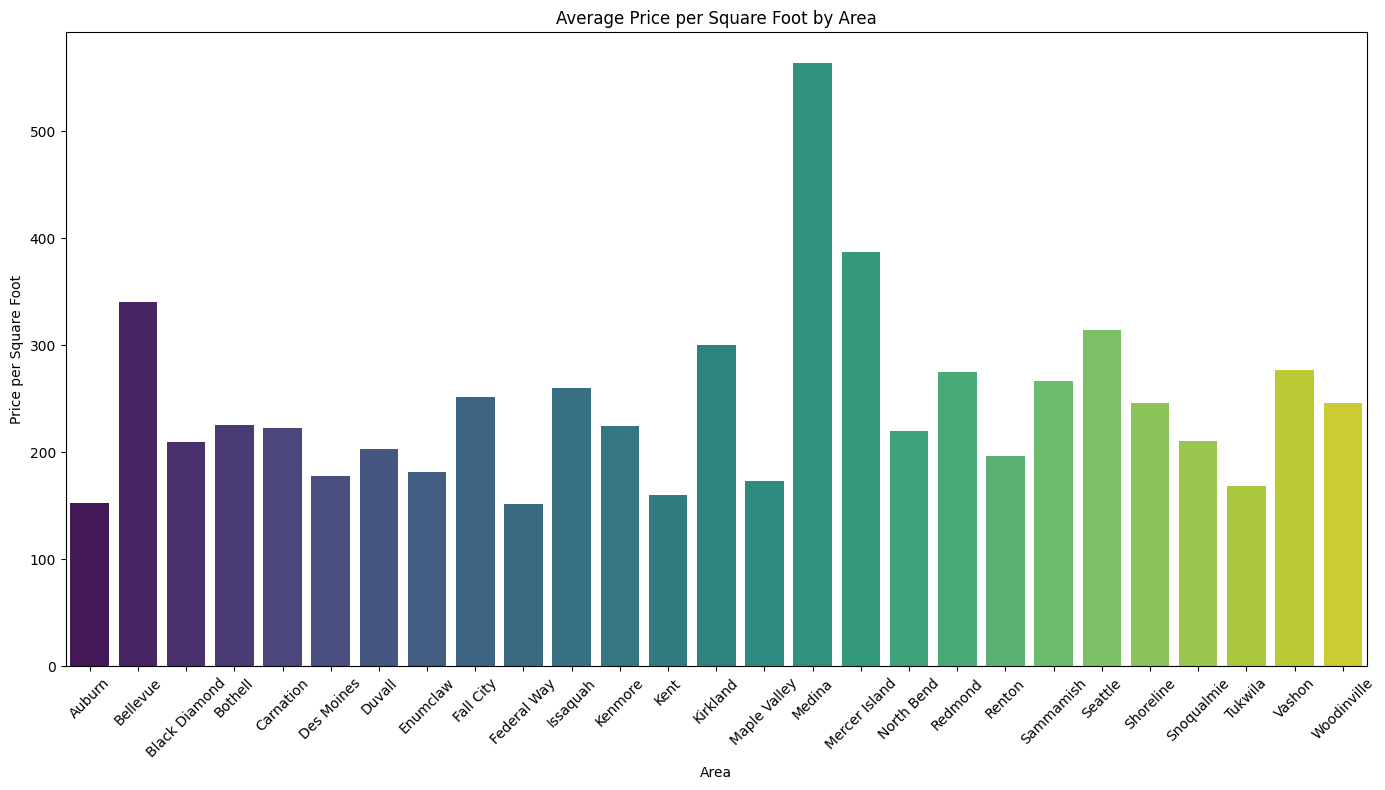

Average Price per Square Foot by Area:
             area  price_per_sqft
0          Auburn      152.834371
1        Bellevue      340.076329
2   Black Diamond      210.106872
3         Bothell      225.692934
4       Carnation      223.021115
5      Des Moines      178.045022
6          Duvall      203.007336
7        Enumclaw      182.106295
8       Fall City      251.923913
9     Federal Way      151.498852
10       Issaquah      260.549485
11        Kenmore      224.639154
12           Kent      160.320219
13       Kirkland      300.222120
14   Maple Valley      173.444271
15         Medina      564.114278
16  Mercer Island      387.479406
17     North Bend      219.531327
18        Redmond      275.242854
19         Renton      196.472687
20      Sammamish      266.995353
21        Seattle      314.458762
22      Shoreline      246.460188
23     Snoqualmie      210.575728
24        Tukwila      168.857292
25         Vashon      277.380309
26    Woodinville      246.308048


In [ ]:

# Step 1: Calculate Price per Sqft
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Step 2: Group by Area and Calculate Average Price per Sqft
area_price_per_sqft = df.groupby('area')['price_per_sqft'].mean().reset_index()

# Step 3: Plot average price per square foot across different areas
plt.figure(figsize=(14, 8))
sns.barplot(data=area_price_per_sqft, x='area', y='price_per_sqft', palette='viridis')
plt.title('Average Price per Square Foot by Area')
plt.xlabel('Area')
plt.ylabel('Price per Square Foot')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


print("Average Price per Square Foot by Area:")
print(area_price_per_sqft)

 Identifying Middle-Class Areas Based on Price per Square Foot

In [111]:
# Calculate the lower and upper quartiles (25th and 75th percentiles)
lower_quartile = area_price_per_sqft['price_per_sqft'].quantile(0.25)
upper_quartile = area_price_per_sqft['price_per_sqft'].quantile(0.75)

# Filter for middle-class areas (price per square foot between the 25th and 75th percentiles)
middle_class_areas = area_price_per_sqft[(area_price_per_sqft['price_per_sqft'] >= lower_quartile) & 
                                          (area_price_per_sqft['price_per_sqft'] <= upper_quartile)]

# Display middle-class areas
print("Middle-Class Areas based on Price per Square Foot:")
print(middle_class_areas)


Middle-Class Areas based on Price per Square Foot:
             area  price_per_sqft
2   Black Diamond      210.106872
3         Bothell      225.692934
4       Carnation      223.021115
6          Duvall      203.007336
8       Fall City      251.923913
10       Issaquah      260.549485
11        Kenmore      224.639154
17     North Bend      219.531327
19         Renton      196.472687
20      Sammamish      266.995353
22      Shoreline      246.460188
23     Snoqualmie      210.575728
26    Woodinville      246.308048


C:\Users\twink\AppData\Local\Temp\ipykernel_16344\71264782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=middle_class_areas, x='area', y='price_per_sqft', palette='coolwarm')


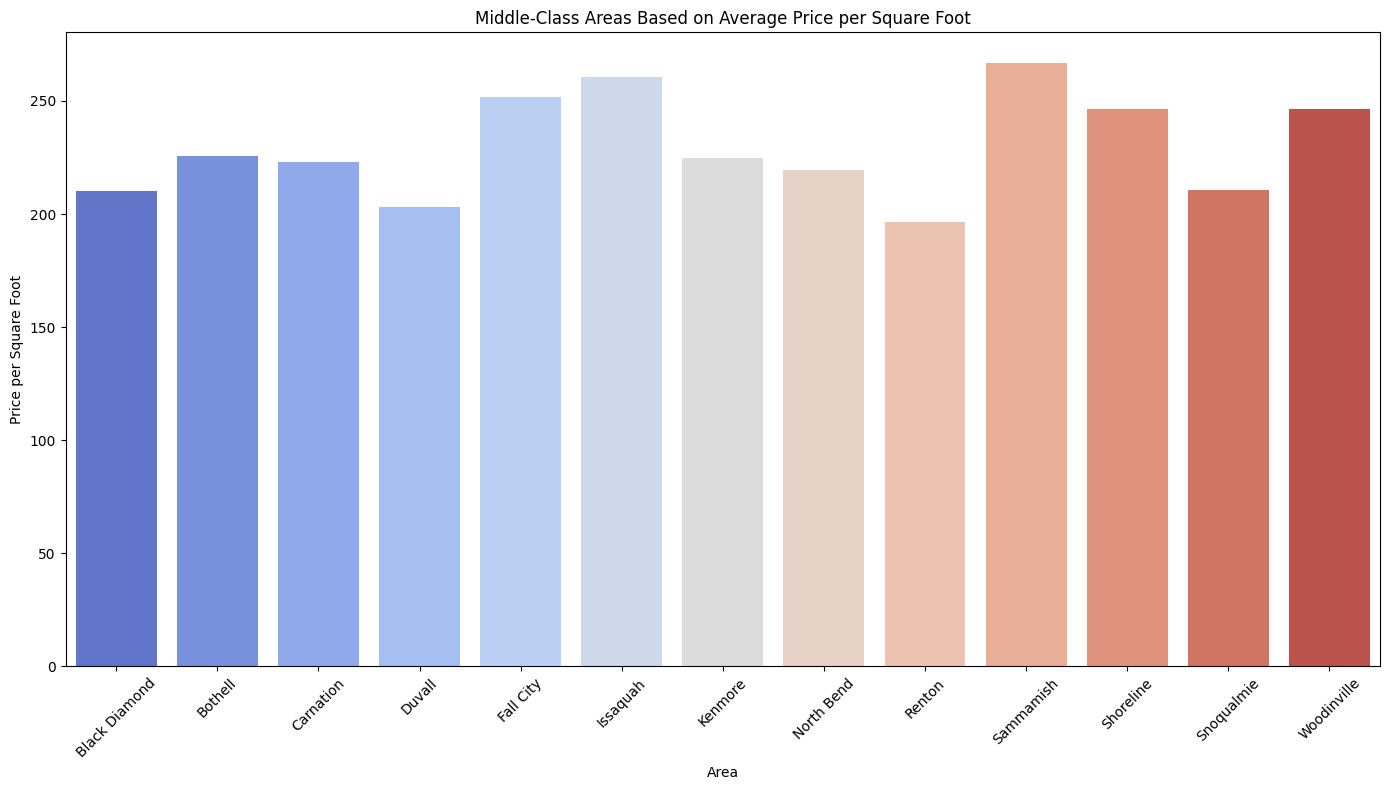

In [ ]:
#Plot average price per square foot for middle-class areas

plt.figure(figsize=(14, 8))
sns.barplot(data=middle_class_areas, x='area', y='price_per_sqft', palette='coolwarm')
plt.title('Middle-Class Areas Based on Average Price per Square Foot')
plt.xlabel('Area')
plt.ylabel('Price per Square Foot')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# List of middle-class neighborhoods based on price per sqft
middle_class_areas = [
    'Black Diamond', 'Bothell', 'Carnation', 'Duvall', 'Fall City', 'Issaquah', 
    'Kenmore', 'North Bend', 'Renton', 'Sammamish', 'Shoreline', 'Snoqualmie', 'Woodinville'
]
filtered_data = df[df['area'].isin(middle_class_areas)]




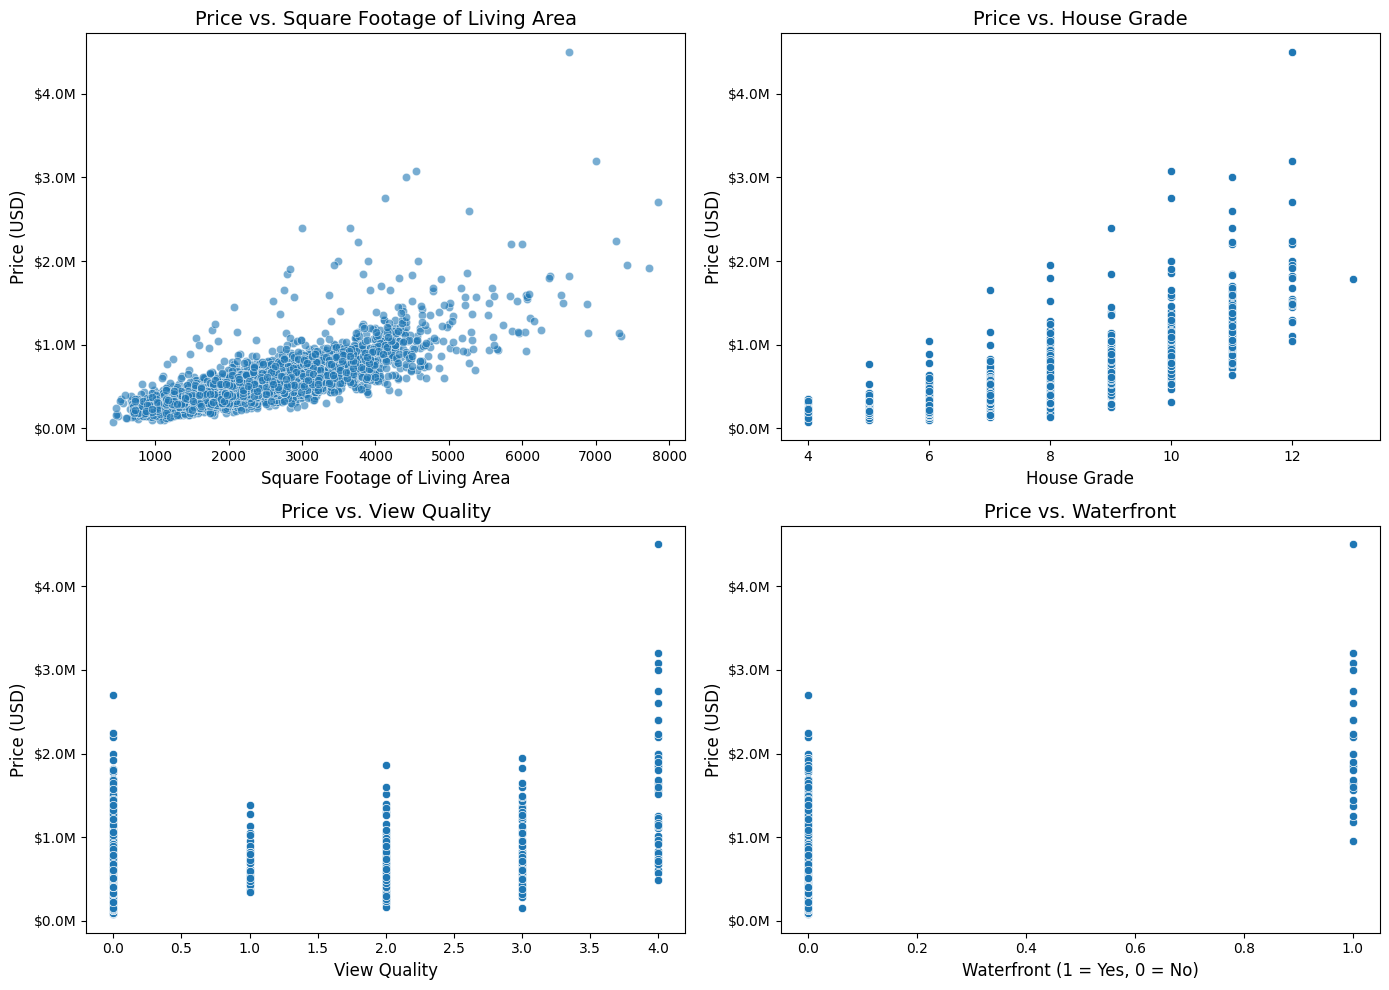

In [ ]:


#  2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Price vs Square Footage of Living Area
sns.scatterplot(x='sqft_living', y='price', data=filtered_data, alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Square Footage of Living Area', fontsize=14)
axes[0, 0].set_xlabel('Square Footage of Living Area', fontsize=12)
axes[0, 0].set_ylabel('Price (USD)', fontsize=12)
axes[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

# Scatter plot: Price vs House Grade
sns.scatterplot(x='grade', y='price', data=filtered_data, ax=axes[0, 1])
axes[0, 1].set_title('Price vs. House Grade', fontsize=14)
axes[0, 1].set_xlabel('House Grade', fontsize=12)
axes[0, 1].set_ylabel('Price (USD)', fontsize=12)
axes[0, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

# Scatter plot: Price vs View Quality
sns.scatterplot(x='view', y='price', data=filtered_data, ax=axes[1, 0])
axes[1, 0].set_title('Price vs. View Quality', fontsize=14)
axes[1, 0].set_xlabel('View Quality', fontsize=12)
axes[1, 0].set_ylabel('Price (USD)', fontsize=12)
axes[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

# Scatter plot: Price vs Waterfront
sns.scatterplot(x='waterfront', y='price', data=filtered_data, ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Waterfront', fontsize=14)
axes[1, 1].set_xlabel('Waterfront (1 = Yes, 0 = No)', fontsize=12)
axes[1, 1].set_ylabel('Price (USD)', fontsize=12)
axes[1, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))


plt.tight_layout()
plt.show()





In [ ]:
middle_class_areas = area_price_per_sqft[
    (area_price_per_sqft['price_per_sqft'] >= lower_quartile) & 
    (area_price_per_sqft['price_per_sqft'] <= upper_quartile)
]

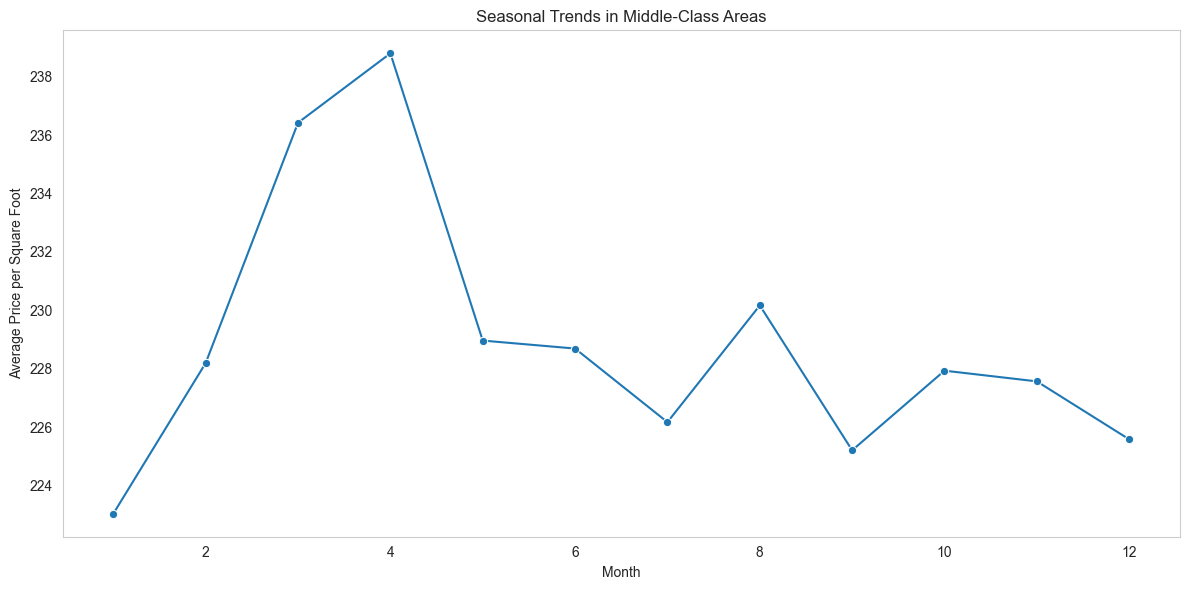

In [ ]:
# Filter data for middle-class areas
middle_class_data = df[df['area'].isin(middle_class_areas['area'])]

# Group by time (e.g., monthly) and calculate mean price per square foot
seasonal_trends = middle_class_data.groupby('month')['price_per_sqft'].mean().reset_index()

# Plot seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trends, x='month', y='price_per_sqft', marker='o')
plt.title('Seasonal Trends in Middle-Class Areas')
plt.xlabel('Month')
plt.ylabel('Average Price per Square Foot')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#  Group by zipcode and calculate average price per sqft
zipcode_prices = df.groupby('zipcode')['price_per_sqft'].mean().reset_index()

# Middle-Class range (40th to 60th percentile)
low, high = zipcode_prices['price_per_sqft'].quantile([0.4, 0.6])

# 🛠 Step 3: Mark middle-class zipcodes
zipcode_prices['middle_class'] = zipcode_prices['price_per_sqft'].between(low, high)

# 🛠 Step 4: Merge back to original data
data = df.merge(zipcode_prices[['zipcode', 'middle_class']], on='zipcode', how='left')

fig = px.scatter_mapbox(
    df,  lat='lat',lon='long',color='price_per_sqft', color_continuous_scale='Viridis',  size_max=15,zoom=9,
    mapbox_style="carto-positron",  
    hover_data={'zipcode': True,'price': True,'price_per_sqft': True,'sqft_living': True,'bedrooms': True,'bathrooms': True,
        'middle_class': True, 'lat': False,'long': False},
    height=700,
    title='📍 King County Housing Map: Price per Square Foot'
)

fig.show()



C:\Users\twink\AppData\Local\Temp\ipykernel_5352\3651805532.py:16: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



C:\Users\twink\AppData\Local\Temp\ipykernel_16344\1418459715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Renovated'] = filtered_data['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No')


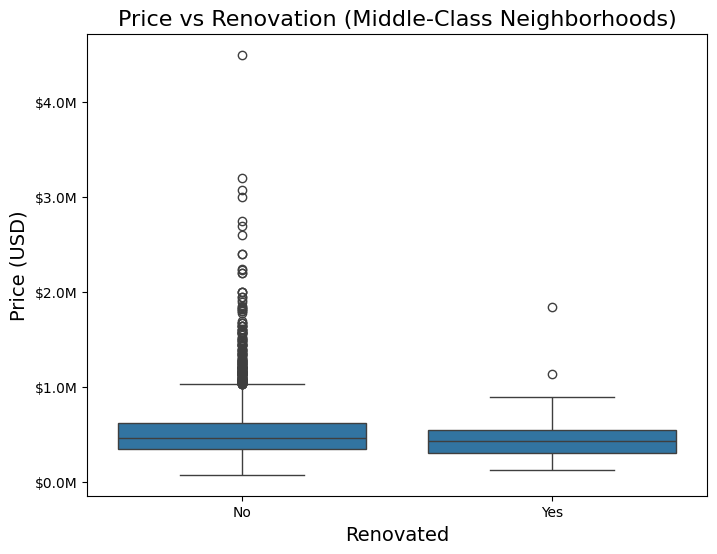

In [ ]:

# Create a new column 'Renovated' that indicates whether a house was renovated
filtered_data['Renovated'] = filtered_data['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Create the box plot to compare price for renovated vs non-renovated houses
plt.figure(figsize=(8, 6))
sns.boxplot(x='Renovated', y='price', data=filtered_data)


plt.title('Price vs Renovation (Middle-Class Neighborhoods)', fontsize=16)
plt.xlabel('Renovated', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.show()



